# TF-IDF with Chinese sentences

Using TF-IDF is almost exactly the same with Chinese as it is with Engish. The only differences come before the word-counting part: Chinese is tough to split into separate words, while English is terrible at having standardized endings. Let's take a look!

<p class="reading-options">
  <a class="btn" href="/text-analysis/using-tf-idf-with-chinese">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/text-analysis/notebooks/Using TF-IDF with Chinese.ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/text-analysis/notebooks/Using TF-IDF with Chinese.ipynb" target="_new">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

In [3]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = 'Arial Unicode MS'
matplotlib.rcParams['axes.labelsize'] = '15'

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import jieba

pd.options.display.max_columns = 30
%matplotlib inline

## Text analysis refresher

Text analysis has a few parts. We are going to use **bag of words** analysis, which just treats a sentence like a bag of words - no particular order or anything. It's simple but it usually gets the job done adequately.

Here is our text.

In [5]:
texts = [
  '翠花买了浅蓝色的鱼',
  '翠花买了浅蓝橙色的鱼',
  '猫在商店吃了一条鱼',
  '翠花去了商店。翠花买了一只虫子。翠花看到一条鱼',
  '它对这个虫子喵喵叫了一声，它现在仍然在对这只虫子和这条鱼喵喵叫',
  '这只猫在鱼店里。这只猫是橙色的。这只猫正在对这条鱼喵喵叫。',
  '翠花是鱼'  
]

When you process text, you have a nice long series of steps, but let's say you're interested in three things:

1. **Tokenizing** converts all of the sentences/phrases/etc into a series of words, and then it might also include converting it into a series of numbers - math stuff only works with numbers, not words. So maybe 'cat' is 2 and 'rug' is 4 and stuff like that.
2. **Counting** takes those words and sees how many there are (obviously) - how many times does `meow` appear?
3. **Normalizing** takes the count and makes new numbers - maybe it's how many times `meow` appears vs. how many total words there are, or maybe you're seeing how often `meow` comes up to see whether it's important.

Penny bought bright blue fishes


tokenized - penny bought bright blue fishes


у меня зазвонил телефон


私はえんぴつです。

In [6]:
"Penny bought bright blue fishes".split(" ")

['Penny', 'bought', 'bright', 'blue', 'fishes']

In [7]:
list("翠花买了浅蓝色的鱼")

['翠', '花', '买', '了', '浅', '蓝', '色', '的', '鱼']

In [8]:
jieba.lcut("翠花买了浅蓝色的鱼")

['翠花', '买', '了', '浅蓝色', '的', '鱼']

In [9]:
jieba.lcut_for_search("翠花买了浅蓝色的鱼")

['翠花', '买', '了', '浅蓝', '蓝色', '浅蓝色', '的', '鱼']

The `scikit-learn` package does a **ton of stuff**, some of which includes the above. We're going to start by playing with the `CountVectorizer`.

When we use the **CountVectorizer** we need to tell it hey, we want to use `jieba` to cut our words up!

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(tokenizer=jieba.lcut)

In [12]:
# .fit_transfer TOKENIZES and COUNTS
X = count_vectorizer.fit_transform(texts)

Let's take a look at what it found out!

In [13]:
X

<7x34 sparse matrix of type '<class 'numpy.int64'>'
	with 66 stored elements in Compressed Sparse Row format>

Okay, that looks like trash and garbage. What's a "sparse array"??????

In [14]:
X.toarray()

array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 4, 1, 2, 2, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1],
       [3, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 3, 0, 1, 0, 0, 0, 3, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]], dtype=int64)

If we put on our **Computer Goggles** we see that the first sentence has the first word 3 times, the second word 1 time, the third word 1 time, etc... But we can't *read* it, really. It would look nicer as a dataframe.

In [15]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,2,1,0,1,1,2,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,3,1,0,0,0,1,0
4,0,0,1,0,0,1,1,0,1,2,0,1,0,4,1,...,0,0,0,0,0,1,0,0,0,2,1,1,1,1,1
5,3,0,0,0,0,0,0,0,3,1,0,0,0,2,1,...,1,1,0,0,3,0,1,0,0,0,3,0,1,2,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


What do all of those numbers mean????

In [16]:
# Penny is a fish
# A fish is Penny
count_vectorizer.get_feature_names()

['。',
 '一只',
 '一声',
 '一条',
 '买',
 '了',
 '仍然',
 '去',
 '只',
 '叫',
 '吃',
 '和',
 '商店',
 '喵',
 '在',
 '它',
 '对',
 '店里',
 '是',
 '橙色',
 '正在',
 '浅蓝',
 '浅蓝色',
 '猫',
 '现在',
 '的',
 '看到',
 '翠花',
 '虫子',
 '这',
 '这个',
 '这条',
 '鱼',
 '，']

In [17]:
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

,。,一只,一声,一条,买,了,仍然,去,只,叫,吃,和,商店,喵,在,...,橙色,正在,浅蓝,浅蓝色,猫,现在,的,看到,翠花,虫子,这,这个,这条,鱼,，
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,2,1,0,1,1,2,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,3,1,0,0,0,1,0
4,0,0,1,0,0,1,1,0,1,2,0,1,0,4,1,...,0,0,0,0,0,1,0,0,0,2,1,1,1,1,1
5,3,0,0,0,0,0,0,0,3,1,0,0,0,2,1,...,1,1,0,0,3,0,1,0,0,0,3,0,1,2,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [18]:
chinese_stopwords = ["、","。","〈","〉","《","》","一","一些","一何","一切","一则","一方面","一旦","一来","一样","一般","一转眼","七","万一","三","上","上下","下","不","不仅","不但","不光","不单","不只","不外乎","不如","不妨","不尽","不尽然","不得","不怕","不惟","不成","不拘","不料","不是","不比","不然","不特","不独","不管","不至于","不若","不论","不过","不问","与","与其","与其说","与否","与此同时","且","且不说","且说","两者","个","个别","中","临","为","为了","为什么","为何","为止","为此","为着","乃","乃至","乃至于","么","之","之一","之所以","之类","乌乎","乎","乘","九","也","也好","也罢","了","二","二来","于","于是","于是乎","云云","云尔","五","些","亦","人","人们","人家","什","什么","什么样","今","介于","仍","仍旧","从","从此","从而","他","他人","他们","他们们","以","以上","以为","以便","以免","以及","以故","以期","以来","以至","以至于","以致","们","任","任何","任凭","会","似的","但","但凡","但是","何","何以","何况","何处","何时","余外","作为","你","你们","使","使得","例如","依","依据","依照","便于","俺","俺们","倘","倘使","倘或","倘然","倘若","借","借傥然","假使","假如","假若","做","像","儿","先不先","光是","全体","全部","八","六","兮","共","关于","关于具体地说","其","其一","其中","其二","其他","其余","其它","其次","具体地说","具体说来","兼之","内","再","再其次","再则","再有","再者","再者说","再说","冒","冲","况且","几","几时","凡","凡是","凭","凭借","出于","出来","分","分别","则","则甚","别","别人","别处","别是","别的","别管","别说","到","前后","前此","前者","加之","加以","即","即令","即使","即便","即如","即或","即若","却","去","又","又及","及","及其","及至","反之","反而","反过来","反过来说","受到","另","另一方面","另外","另悉","只","只当","只怕","只是","只有","只消","只要","只限","叫","叮咚","可","可以","可是","可见","各","各个","各位","各种","各自","同","同时","后","后者","向","向使","向着","吓","吗","否则","吧","吧哒","含","吱","呀","呃","呕","呗","呜","呜呼","呢","呵","呵呵","呸","呼哧","咋","和","咚","咦","咧","咱","咱们","咳","哇","哈","哈哈","哉","哎","哎呀","哎哟","哗","哟","哦","哩","哪","哪个","哪些","哪儿","哪天","哪年","哪怕","哪样","哪边","哪里","哼","哼唷","唉","唯有","啊","啐","啥","啦","啪达","啷当","喂","喏","喔唷","喽","嗡","嗡嗡","嗬","嗯","嗳","嘎","嘎登","嘘","嘛","嘻","嘿","嘿嘿","四","因","因为","因了","因此","因着","因而","固然","在","在下","在于","地","基于","处在","多","多么","多少","大","大家","她","她们","好","如","如上","如上所述","如下","如何","如其","如同","如是","如果","如此","如若","始而","孰料","孰知","宁","宁可","宁愿","宁肯","它","它们","对","对于","对待","对方","对比","将","小","尔","尔后","尔尔","尚且","就","就是","就是了","就是说","就算","就要","尽","尽管","尽管如此","岂但","己","已","已矣","巴","巴巴","年","并","并且","庶乎","庶几","开外","开始","归","归齐","当","当地","当然","当着","彼","彼时","彼此","往","待","很","得","得了","怎","怎么","怎么办","怎么样","怎奈","怎样","总之","总的来看","总的来说","总的说来","总而言之","恰恰相反","您","惟其","慢说","我","我们","或","或则","或是","或曰","或者","截至","所","所以","所在","所幸","所有","才","才能","打","打从","把","抑或","拿","按","按照","换句话说","换言之","据","据此","接着","故","故此","故而","旁人","无","无宁","无论","既","既往","既是","既然","日","时","时候","是","是以","是的","更","曾","替","替代","最","月","有","有些","有关","有及","有时","有的","望","朝","朝着","本","本人","本地","本着","本身","来","来着","来自","来说","极了","果然","果真","某","某个","某些","某某","根据","欤","正值","正如","正巧","正是","此","此地","此处","此外","此时","此次","此间","毋宁","每","每当","比","比及","比如","比方","没奈何","沿","沿着","漫说","焉","然则","然后","然而","照","照着","犹且","犹自","甚且","甚么","甚或","甚而","甚至","甚至于","用","用来","由","由于","由是","由此","由此可见","的","的确","的话","直到","相对而言","省得","看","眨眼","着","着呢","矣","矣乎","矣哉","离","秒","竟而","第","等","等到","等等","简言之","管","类如","紧接着","纵","纵令","纵使","纵然","经","经过","结果","给","继之","继后","继而","综上所述","罢了","者","而","而且","而况","而后","而外","而已","而是","而言","能","能否","腾","自","自个儿","自从","自各儿","自后","自家","自己","自打","自身","至","至于","至今","至若","致","般的","若","若夫","若是","若果","若非","莫不然","莫如","莫若","虽","虽则","虽然","虽说","被","要","要不","要不是","要不然","要么","要是","譬喻","譬如","让","许多","论","设使","设或","设若","诚如","诚然","该","说","说来","请","诸","诸位","诸如","谁","谁人","谁料","谁知","贼死","赖以","赶","起","起见","趁","趁着","越是","距","跟","较","较之","边","过","还","还是","还有","还要","这","这一来","这个","这么","这么些","这么样","这么点儿","这些","这会儿","这儿","这就是说","这时","这样","这次","这般","这边","这里","进而","连","连同","逐步","通过","遵循","遵照","那","那个","那么","那么些","那么样","那些","那会儿","那儿","那时","那样","那般","那边","那里","都","鄙人","鉴于","针对","阿","除","除了","除外","除开","除此之外","除非","随","随后","随时","随着","难道说","零","非","非但","非徒","非特","非独","靠","顺","顺着","首先","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"]

Some sentences have words (or non-words) that we don't like. Things like "。" or "，" or other words that are not important.

Those are garbage words! They're making our dataframe complicated! We need to add **stopwords!**

In [19]:
# We'll make a new vectorizer
count_vectorizer = CountVectorizer(stop_words=chinese_stopwords, tokenizer=jieba.lcut)
#count_vectorizer = CountVectorizer(stop_words=['the', 'and'])
# .fit_transfer TOKENIZES and COUNTS
X = count_vectorizer.fit_transform(texts)
print(count_vectorizer.get_feature_names())

['一只', '一声', '一条', '买', '仍然', '吃', '商店', '喵', '店里', '橙色', '正在', '浅蓝', '浅蓝色', '猫', '现在', '看到', '翠花', '虫子', '这条', '鱼']


In [20]:
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

,一只,一声,一条,买,仍然,吃,商店,喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
2,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,3,1,0,1
4,0,1,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,2,1,1
5,0,0,0,0,0,0,0,2,1,1,1,0,0,3,0,0,0,0,1,2
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


If we were using English, we could still see `meowed` and `meowing` and `fish` and `fishes`. They're almost the same, so we would **lemmatize** or **stem** them. This isn't important in Chinese, though!

Let's think about our dataframe again.

In [22]:
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

,一只,一声,一条,买,仍然,吃,商店,喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
2,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,3,1,0,1
4,0,1,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,2,1,1
5,0,0,0,0,0,0,0,2,1,1,1,0,0,3,0,0,0,0,1,2
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


## TF-IDF

### Part One: Term Frequency

TF-IDF? What? It means **term frequency inverse document frequency!** It's the most important thing. Let's look at our list of phrases

1. Penny bought bright blue fishes.
2. Penny bought bright blue and orange fish.
3. The cat ate a fish at the store.
4. Penny went to the store. Penny ate a bug. Penny saw a fish.
5. It meowed once at the fish, it is still meowing at the fish. It meowed at the bug and the fish.
6. The cat is fat. The cat is orange. The cat is meowing at the fish.
7. Penny is a fish

If we're searching for the word `fish`, which is the most helpful phrase?

In [23]:
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

,一只,一声,一条,买,仍然,吃,商店,喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
2,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,3,1,0,1
4,0,1,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,2,1,1
5,0,0,0,0,0,0,0,2,1,1,1,0,0,3,0,0,0,0,1,2
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


Probably the one where `fish` appears three times.

    It meowed once at the fish, it is still meowing at the fish. It meowed at the bug and the fish.
    
But are all the others the same?

    Penny is a fish.

    Penny went to the store. Penny ate a bug. Penny saw a fish.

In the second one we spend less time talking about the fish. Think about a huge long document where they say your name once, versus a tweet where they say your name once. Which one are you more important in? Probably the tweet, since you take up a larger percentage of the text.

This is **term frequency** - taking into account how often a term shows up. We're going to take this into account by using the `TfidfVectorizer` in the same way we used the `CountVectorizer`.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf_vectorizer = TfidfVectorizer(stop_words=chinese_stopwords, tokenizer=jieba.lcut, use_idf=False, norm='l1')
X = tfidf_vectorizer.fit_transform(texts)
pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())

,一只,一声,一条,买,仍然,吃,商店,喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0.0,0.000000,0.0,0.25,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.25,0.000000,0.000000,0.0,0.25,0.000000,0.000000,0.250000
1,0.0,0.000000,0.0,0.20,0.000000,0.0,0.0,0.000000,0.000000,0.200000,0.000000,0.2,0.00,0.000000,0.000000,0.0,0.20,0.000000,0.000000,0.200000
2,0.0,0.000000,0.2,0.00,0.000000,0.2,0.2,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.200000,0.000000,0.0,0.00,0.000000,0.000000,0.200000
3,0.1,0.000000,0.1,0.10,0.000000,0.0,0.1,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.1,0.30,0.100000,0.000000,0.100000
4,0.0,0.090909,0.0,0.00,0.090909,0.0,0.0,0.363636,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.090909,0.0,0.00,0.181818,0.090909,0.090909
5,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.181818,0.090909,0.090909,0.090909,0.0,0.00,0.272727,0.000000,0.0,0.00,0.000000,0.090909,0.181818
6,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.50,0.000000,0.000000,0.500000


Now our numbers have shifted a little bit. Instead of just being a count, it's *the percentage of the words*.

    value = (number of times word appears in sentence) / (number of words in sentence)

After we remove the stopwords, the term `fish` is 50% of the words in `Penny is a fish` vs. 37.5% in `It meowed once at the fish, it is still meowing at the fish. It meowed at the bug and the fish.`.

> **Note:** We made it be the percentage of the words by passing in `norm="l1"` - by default it's normally an L2 (Euclidean) norm, which is actually better, but I thought it would make more sense using the L1 - a.k.a. terms divided by words -norm.

So now when we search we'll get **more relevant results** because it takes into account whether half of our words are `fish` or 1% of millions upon millions of words is `fish`. But we aren't done yet!

### Part Two: Inverse document frequency

Let's say we're searching for "fish meow"

In [28]:
def tokenize(sentence):
    without_duplicates = re.sub(r'(.)\1+', r'\1\1', sentence)
    without_punctuation = re.sub(r'[^\w]','',without_duplicates)
    return jieba.lcut(without_duplicates)

In [29]:
tfidf_vectorizer = TfidfVectorizer(stop_words=chinese_stopwords, tokenizer=tokenize, use_idf=False, norm='l1')
X = tfidf_vectorizer.fit_transform(texts)
df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())
df

,一只,一声,一条,买,仍然,吃,商店,喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0.0,0.000000,0.0,0.25,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.25,0.000000,0.000000,0.0,0.25,0.000000,0.000000,0.250000
1,0.0,0.000000,0.0,0.20,0.000000,0.0,0.0,0.000000,0.000000,0.200000,0.000000,0.2,0.00,0.000000,0.000000,0.0,0.20,0.000000,0.000000,0.200000
2,0.0,0.000000,0.2,0.00,0.000000,0.2,0.2,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.200000,0.000000,0.0,0.00,0.000000,0.000000,0.200000
3,0.1,0.000000,0.1,0.10,0.000000,0.0,0.1,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.1,0.30,0.100000,0.000000,0.100000
4,0.0,0.090909,0.0,0.00,0.090909,0.0,0.0,0.363636,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.090909,0.0,0.00,0.181818,0.090909,0.090909
5,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.181818,0.090909,0.090909,0.090909,0.0,0.00,0.272727,0.000000,0.0,0.00,0.000000,0.090909,0.181818
6,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.50,0.000000,0.000000,0.500000


What's the highest combined? for 'fish' and 'meow'?

In [31]:
# texts = [
#   '翠花买了浅蓝色的鱼',
#   '翠花买了浅蓝橙色的鱼',
#   '猫在商店吃了一条鱼',
#   '翠花去了商店。翠花买了一只虫子。翠花看到一条鱼',
#   '它对这个虫子喵喵叫了一声，它现在仍然在对这只虫子和这条鱼喵喵叫',
#   '这只猫在鱼店里。这只猫是橙色的。这只猫正在对这条鱼喵喵叫。',
#   '翠花是鱼'  
# ]

In [30]:
# Just add the columns together
pd.DataFrame([df['鱼'], df['喵'], df['鱼'] + df['喵']], index=["鱼", "喵", "鱼 + 喵"]).T

,鱼,喵,鱼 + 喵
0,0.250000,0.000000,0.250000
1,0.200000,0.000000,0.200000
2,0.200000,0.000000,0.200000
3,0.100000,0.000000,0.100000
4,0.090909,0.363636,0.454545
5,0.181818,0.181818,0.363636
6,0.500000,0.000000,0.500000


Indices 4 and 6 (numbers 5 and 7) are tied - but meow never even appears in one of them!

    It meowed once at the bug, it is still meowing at the bug and the fish
    Penny is a fish

It seems like since `fish` shows up again and again it should be weighted a little less - not like it's a *stopword*, but just... it's kind of cliche to have it show up in the text, so we want to make it less important.

This is **inverse document frequency** - the more often a term shows up across *all* documents, the less important it is in our matrix.

In [32]:
# use_idf=True is default, but I'll leave it in
idf_vectorizer = TfidfVectorizer(stop_words=chinese_stopwords, tokenizer=tokenize, use_idf=True, norm='l1')
X = idf_vectorizer.fit_transform(texts)
idf_df = pd.DataFrame(X.toarray(), columns=idf_vectorizer.get_feature_names())
idf_df

,一只,一声,一条,买,仍然,吃,商店,喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0.000000,0.000000,0.000000,0.258518,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.364351,0.000000,0.000000,0.000000,0.224447,0.000000,0.000000,0.152685
1,0.000000,0.000000,0.000000,0.198487,0.000000,0.000000,0.000000,0.000000,0.000000,0.232212,0.000000,0.279744,0.000000,0.000000,0.000000,0.000000,0.172328,0.000000,0.000000,0.117230
2,0.000000,0.000000,0.212335,0.000000,0.000000,0.255799,0.212335,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.212335,0.000000,0.000000,0.000000,0.000000,0.000000,0.107195
3,0.133924,0.000000,0.111169,0.095023,0.000000,0.000000,0.111169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133924,0.247500,0.111169,0.000000,0.056122
4,0.000000,0.108346,0.000000,0.000000,0.108346,0.000000,0.000000,0.359747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.108346,0.000000,0.000000,0.179874,0.089937,0.045404
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.191956,0.115624,0.095978,0.115624,0.000000,0.000000,0.287934,0.000000,0.000000,0.000000,0.000000,0.095978,0.096907
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.595142,0.000000,0.000000,0.404858


Let's take a look at our OLD values, then our NEW values, just for `meow` and `fish`.

In [33]:
# OLD dataframe
pd.DataFrame([df['鱼'], df['喵'], df['鱼'] + df['喵']], index=["鱼", "喵", "鱼 + 喵"]).T

,鱼,喵,鱼 + 喵
0,0.250000,0.000000,0.250000
1,0.200000,0.000000,0.200000
2,0.200000,0.000000,0.200000
3,0.100000,0.000000,0.100000
4,0.090909,0.363636,0.454545
5,0.181818,0.181818,0.363636
6,0.500000,0.000000,0.500000


In [34]:
# NEW dataframe
pd.DataFrame([idf_df['鱼'], idf_df['喵'], idf_df['鱼'] + idf_df['喵']], index=["鱼", "喵", "鱼 + 喵"]).T

,鱼,喵,鱼 + 喵
0,0.152685,0.000000,0.152685
1,0.117230,0.000000,0.117230
2,0.107195,0.000000,0.107195
3,0.056122,0.000000,0.056122
4,0.045404,0.359747,0.405151
5,0.096907,0.191956,0.288863
6,0.404858,0.000000,0.404858


Notice how 'meow' increased in value because it's an infrequent term, and `fish` dropped in value because it's so frequent.

That meowing one (index 4) has gone from `0.50` to `0.43`, while `Penny is a fish` (index 6) has dropped to `0.40`. Now hooray, the meowing one is going to show up earlier when searching for "fish meow" because *fish shows up all of the time, so we want to ignore it a lil' bit*.

But honestly **I wasn't very impressed by that drop.**

And this is why defaults are important: let's try changing it to `norm='l2'` (or just removing `norm` completely).

In [35]:
# use_idf=True is default, but I'll leave it in
l2_vectorizer = TfidfVectorizer(stop_words=chinese_stopwords, tokenizer=tokenize, use_idf=True)
X = l2_vectorizer.fit_transform(texts)
l2_df = pd.DataFrame(X.toarray(), columns=l2_vectorizer.get_feature_names())
l2_df

,一只,一声,一条,买,仍然,吃,商店,喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0.000000,0.000000,0.000000,0.494530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.696983,0.000000,0.000000,0.000000,0.429355,0.000000,0.000000,0.292077
1,0.000000,0.000000,0.000000,0.428052,0.000000,0.000000,0.000000,0.000000,0.000000,0.500782,0.000000,0.60329,0.000000,0.000000,0.000000,0.000000,0.371638,0.000000,0.000000,0.252814
2,0.000000,0.000000,0.460964,0.000000,0.000000,0.555321,0.460964,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.460964,0.000000,0.000000,0.000000,0.000000,0.000000,0.232713
3,0.350038,0.000000,0.290562,0.248362,0.000000,0.000000,0.290562,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.350038,0.646891,0.290562,0.000000,0.146687
4,0.000000,0.238058,0.000000,0.000000,0.238058,0.000000,0.000000,0.790435,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.238058,0.000000,0.000000,0.395217,0.197609,0.099761
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.459776,0.276945,0.229888,0.276945,0.00000,0.000000,0.689664,0.000000,0.000000,0.000000,0.000000,0.229888,0.232113
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.826823,0.000000,0.000000,0.562463


In [36]:
# normal TF-IDF dataframe
pd.DataFrame([idf_df['鱼'], idf_df['喵'], idf_df['鱼'] + idf_df['喵']], index=["鱼", "喵", "鱼 + 喵"]).T

,鱼,喵,鱼 + 喵
0,0.152685,0.000000,0.152685
1,0.117230,0.000000,0.117230
2,0.107195,0.000000,0.107195
3,0.056122,0.000000,0.056122
4,0.045404,0.359747,0.405151
5,0.096907,0.191956,0.288863
6,0.404858,0.000000,0.404858


In [37]:
# L2 norm TF-IDF dataframe
pd.DataFrame([l2_df['鱼'], l2_df['喵'], l2_df['鱼'] + l2_df['喵']], index=["鱼", "喵", "鱼 + 喵"]).T

,鱼,喵,鱼 + 喵
0,0.292077,0.000000,0.292077
1,0.252814,0.000000,0.252814
2,0.232713,0.000000,0.232713
3,0.146687,0.000000,0.146687
4,0.099761,0.790435,0.890195
5,0.232113,0.459776,0.691889
6,0.562463,0.000000,0.562463


**LOOK AT HOW IMPORTANT MEOW IS**. Meowing is out of this world important, because *no one ever meows*.

## Who cares? Why do we need to know this?

When someone dumps 100,000 documents on your desk in response to FOIA, you'll start to care! One of the reasons understanding **TF-IDF** is important is because of **document similarity**. By knowing what documents are similar you're able to find related documents and automatically group documents into clusters.

For example! Let's cluster these documents using K-Means clustering (check out [this gif](http://practicalcryptography.com/media/miscellaneous/files/k_mean_send.gif))

### 2 categories of documents

In [38]:
# Initialize a vectorizer
vectorizer = TfidfVectorizer(use_idf=True, stop_words=chinese_stopwords, tokenizer=tokenize)
X = vectorizer.fit_transform(texts)

In [39]:
X

<7x20 sparse matrix of type '<class 'numpy.float64'>'
	with 38 stored elements in Compressed Sparse Row format>

In [40]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.000000,0.000000,0.494530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.696983,0.000000,0.000000,0.000000,0.429355,0.000000,0.000000,0.292077
1,0.000000,0.000000,0.000000,0.428052,0.000000,0.000000,0.000000,0.000000,0.000000,0.500782,0.000000,0.60329,0.000000,0.000000,0.000000,0.000000,0.371638,0.000000,0.000000,0.252814
2,0.000000,0.000000,0.460964,0.000000,0.000000,0.555321,0.460964,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.460964,0.000000,0.000000,0.000000,0.000000,0.000000,0.232713
3,0.350038,0.000000,0.290562,0.248362,0.000000,0.000000,0.290562,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.350038,0.646891,0.290562,0.000000,0.146687
4,0.000000,0.238058,0.000000,0.000000,0.238058,0.000000,0.000000,0.790435,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.238058,0.000000,0.000000,0.395217,0.197609,0.099761
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.459776,0.276945,0.229888,0.276945,0.00000,0.000000,0.689664,0.000000,0.000000,0.000000,0.000000,0.229888,0.232113
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.826823,0.000000,0.000000,0.562463


In [42]:
# KMeans clustering is a method of clustering.
from sklearn.cluster import KMeans

number_of_clusters = 2
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: 喵 猫 鱼 吃 商店
Cluster 1: 翠花 鱼 买 浅蓝色 浅蓝


In [44]:
km.labels_

array([1, 1, 0, 1, 0, 0, 1], dtype=int32)

In [45]:
texts

['翠花买了浅蓝色的鱼',
 '翠花买了浅蓝橙色的鱼',
 '猫在商店吃了一条鱼',
 '翠花去了商店。翠花买了一只虫子。翠花看到一条鱼',
 '它对这个虫子喵喵叫了一声，它现在仍然在对这只虫子和这条鱼喵喵叫',
 '这只猫在鱼店里。这只猫是橙色的。这只猫正在对这条鱼喵喵叫。',
 '翠花是鱼']

In [46]:
results = pd.DataFrame()
results['text'] = texts
results['category'] = km.labels_
results

,text,category
0,翠花买了浅蓝色的鱼,1
1,翠花买了浅蓝橙色的鱼,1
2,猫在商店吃了一条鱼,0
3,翠花去了商店。翠花买了一只虫子。翠花看到一条鱼,1
4,它对这个虫子喵喵叫了一声，它现在仍然在对这只虫子和这条鱼喵喵叫,0
5,这只猫在鱼店里。这只猫是橙色的。这只猫正在对这条鱼喵喵叫。,0
6,翠花是鱼,1


### 4 categories of documents

In [50]:
from sklearn.cluster import KMeans

number_of_clusters = 3
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [51]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: 翠花 鱼 买 浅蓝色 浅蓝
Cluster 1: 喵 猫 这条 虫子 鱼
Cluster 2: 吃 一条 猫 商店 鱼


In [52]:
results = pd.DataFrame()
results['text'] = texts
results['category'] = km.labels_
results

,text,category
0,翠花买了浅蓝色的鱼,0
1,翠花买了浅蓝橙色的鱼,0
2,猫在商店吃了一条鱼,2
3,翠花去了商店。翠花买了一只虫子。翠花看到一条鱼,0
4,它对这个虫子喵喵叫了一声，它现在仍然在对这只虫子和这条鱼喵喵叫,1
5,这只猫在鱼店里。这只猫是橙色的。这只猫正在对这条鱼喵喵叫。,1
6,翠花是鱼,0


## Visualizing on two dimensions

In [62]:
texts = [  
    '翠花买了浅蓝色的鱼',
    '翠花买了浅蓝橙色的鱼',
    '猫在商店吃了一条鱼',
    '翠花去商店。翠花买了一只虫子。翠花看到一条鱼',
    '它对这个虫子喵喵叫了一声，它现在仍然在对这只虫子和这条鱼喵喵叫',
    '这只猫在鱼店里。这只猫是橙色的。这只猫正在对这条鱼喵喵叫',
    '翠花是鱼'  
    '翠花翠花她喜欢鱼翠花翠花不是猫'
    '商店现在关了'
    '那棵树多少岁',
    '我不吃鱼我不吃猫我只吃虫子'
]


# Initialize a vectorizer
vectorizer = TfidfVectorizer(use_idf=True, max_features=2, tokenizer=tokenize, stop_words=chinese_stopwords)
X = vectorizer.fit_transform(texts)

In [63]:
vectorizer.get_feature_names()

['翠花', '鱼']

In [64]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df

,翠花,鱼
0,0.817697,0.575649
1,0.817697,0.575649
2,0.000000,1.000000
3,0.973554,0.228457
4,0.000000,1.000000
5,0.000000,1.000000
6,1.000000,0.000000
7,0.000000,1.000000


Text(0,0.5,'鱼')

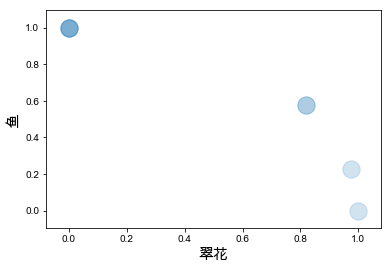

In [65]:
ax = df.plot(kind='scatter', x='翠花', y='鱼', alpha=0.2, s=300)
ax.set_xlabel("翠花")
ax.set_ylabel("鱼")

In [66]:
from sklearn.cluster import KMeans

number_of_clusters = 3
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)
df['category'] = km.labels_

In [67]:
df

,翠花,鱼,category
0,0.817697,0.575649,1
1,0.817697,0.575649,1
2,0.000000,1.000000,0
3,0.973554,0.228457,2
4,0.000000,1.000000,0
5,0.000000,1.000000,0
6,1.000000,0.000000,2
7,0.000000,1.000000,0


Text(0,0.5,'鱼')

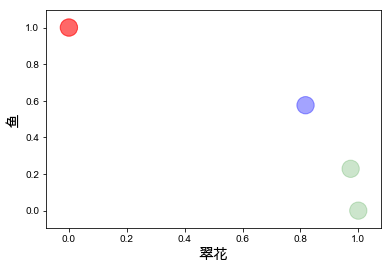

In [68]:
color_list = ['r', 'b', 'g', 'y']
colors = [color_list[i] for i in df['category']]

ax = df.plot(kind='scatter', x='翠花', y='鱼', alpha=0.2, s=300, c=colors)
ax.set_xlabel("翠花")
ax.set_ylabel("鱼")

In [78]:
# Initialize a vectorizer
vectorizer = TfidfVectorizer(use_idf=True, max_features=3, tokenizer=tokenize, stop_words=chinese_stopwords)
X = vectorizer.fit_transform(texts)

In [79]:
vectorizer.get_feature_names()

['喵', '翠花', '鱼']

In [80]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df

,喵,翠花,鱼
0,0.000000,0.817697,0.575649
1,0.000000,0.817697,0.575649
2,0.000000,0.000000,1.000000
3,0.000000,0.973554,0.228457
4,0.991251,0.000000,0.131992
5,0.882611,0.000000,0.470105
6,0.000000,1.000000,0.000000
7,0.000000,0.000000,1.000000


In [81]:
from sklearn.cluster import KMeans

number_of_clusters = 4
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)
df['category'] = km.labels_

In [82]:
df['text'] = texts
df

,喵,翠花,鱼,category,text
0,0.000000,0.817697,0.575649,0,翠花买了浅蓝色的鱼
1,0.000000,0.817697,0.575649,0,翠花买了浅蓝橙色的鱼
2,0.000000,0.000000,1.000000,2,猫在商店吃了一条鱼
3,0.000000,0.973554,0.228457,3,翠花去商店。翠花买了一只虫子。翠花看到一条鱼
4,0.991251,0.000000,0.131992,1,它对这个虫子喵喵叫了一声，它现在仍然在对这只虫子和这条鱼喵喵叫
5,0.882611,0.000000,0.470105,1,这只猫在鱼店里。这只猫是橙色的。这只猫正在对这条鱼喵喵叫
6,0.000000,1.000000,0.000000,3,翠花是鱼翠花翠花她喜欢鱼翠花翠花不是猫商店现在关了那棵树多少岁
7,0.000000,0.000000,1.000000,2,我不吃鱼我不吃猫我只吃虫子


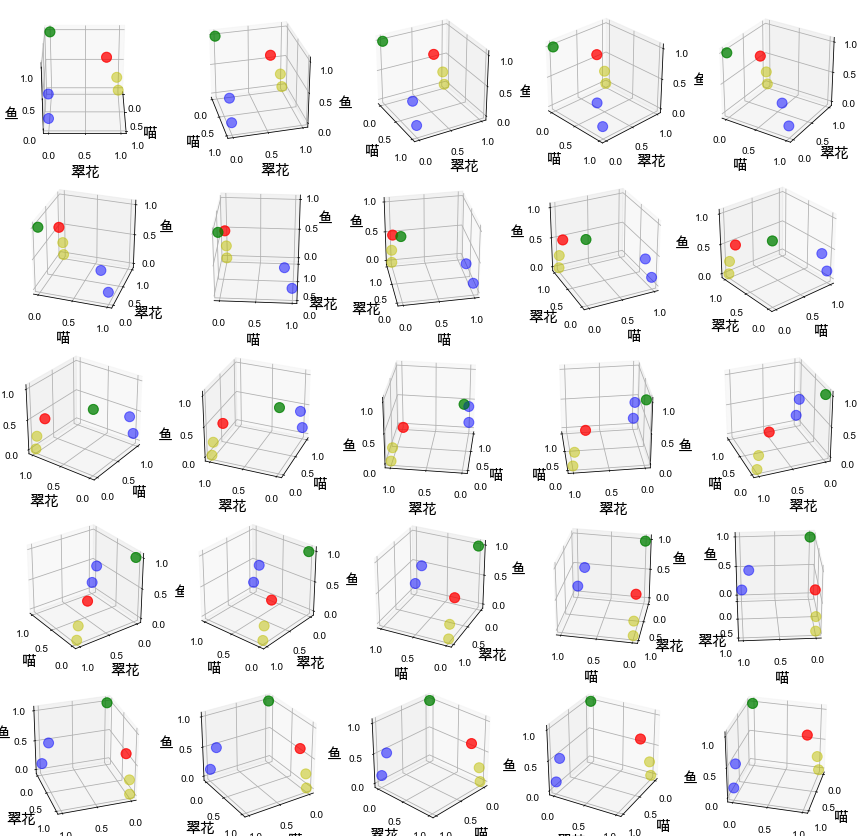

In [83]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw(ax, df):
    color_list = ['r', 'b', 'g', 'y']
    colors = [color_list[i] for i in df['category']]

    marker_list = ['o', 'x', 'v', 'X']
    markers = [marker_list[i] for i in df['category']]
    features = vectorizer.get_feature_names()
    
    ax.scatter(df[features[0]], df[features[1]], df[features[2]], c=colors, s=100, alpha=0.5)
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel(features[2])

chart_count_vert = 5
chart_count_horiz = 5
number_of_graphs = chart_count_vert * chart_count_horiz

fig = plt.figure(figsize=(3 * chart_count_horiz, 3 * chart_count_vert))

for i in range(number_of_graphs):
    ax = fig.add_subplot(chart_count_horiz, chart_count_vert, i + 1, projection='3d', azim=(-360 / number_of_graphs) * i)
    draw(ax, df)